<a href="https://colab.research.google.com/github/Nongbon/INTERNSHIP_NARIT/blob/main/M_phot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import seaborn as sns
from random import seed


In [2]:
!wget https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv

--2021-05-28 18:30:09--  https://raw.githubusercontent.com/Nongbon/INTERNSHIP_NARIT/main/data_phot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24156 (24K) [text/plain]
Saving to: ‘data_phot.csv’

data_phot.csv       100%[===================>]  23.59K  --.-KB/s    in 0.001s  

2021-05-28 18:30:09 (41.7 MB/s) - ‘data_phot.csv’ saved [24156/24156]



In [3]:
data_phot = pd.read_csv("data_phot.csv").drop(['E(B-V)'],axis=1)
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,New_r
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025
...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772


In [4]:
data_phot['d_hi-d'] = data_phot.d_hi - data_phot.d_est
data_phot['d_lo-d'] = data_phot.d_lo - data_phot.d_est
data_phot['sd_d'] = (data_phot['d_hi-d'] + data_phot['d_lo-d']) / 2 
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,New_r,d_hi-d,d_lo-d,sd_d
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309


In [5]:
#GENERATE
data_sample_d = []
data_sample_d = pd.DataFrame(data_sample_d)

for i in range(208) :
  data_sample_d[i] = np.random.normal(data_phot.d_est[i] , data_phot.sd_d[i], 10**4) 
  

In [6]:
data_sample_d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207
0,193.000682,106.546117,40.706234,148.681242,201.878102,111.971638,144.104617,45.523942,172.672240,23.997051,110.179735,178.775743,202.407486,139.237660,163.703753,83.718919,27.730553,45.275908,100.477068,41.655863,92.930891,194.480993,111.368218,152.210832,53.110479,157.413568,154.255792,66.221792,148.851177,474.140527,135.176059,113.817447,191.964788,98.360592,109.552608,91.623293,78.446711,261.389603,71.057229,124.092573,...,315.632495,97.832687,92.823836,244.474685,109.748569,132.832973,144.056764,231.258660,144.067836,132.848585,51.681304,188.032959,317.289928,60.037369,85.440362,157.835098,134.851634,192.357274,97.096987,173.529695,58.284422,184.086470,190.339586,107.879336,101.493423,64.421232,219.875744,159.093285,217.539501,141.895587,301.413835,121.717921,162.917833,248.973876,80.200975,75.955267,199.563963,68.307202,79.890015,126.621902
1,192.976020,106.517061,40.706413,148.678116,201.789500,111.973595,144.095425,45.524239,172.657369,23.996985,110.165639,178.868118,202.337396,139.268707,163.805486,83.717894,27.730024,45.275975,100.475880,41.655890,92.933204,194.464224,111.368618,152.233190,53.109185,157.367741,154.260918,66.221809,148.611148,474.658281,134.775441,113.810990,193.582183,98.350397,109.551565,91.610934,78.446522,261.364803,71.056642,124.095219,...,315.342284,97.828270,92.835005,244.417099,109.747059,132.848509,144.079429,231.194184,144.087944,132.845310,51.680651,187.951817,317.067923,60.036997,85.438440,157.833818,134.842022,192.340758,97.079324,173.540690,58.284452,183.809214,190.279194,107.878556,101.457839,64.335676,219.862306,159.156435,217.557317,141.894950,301.487287,121.718544,162.896872,249.144739,80.201211,75.954529,199.506287,68.307339,79.897864,126.621116
2,192.912030,106.539460,40.706518,148.662047,201.892769,111.966266,144.105378,45.524116,172.679352,23.997052,110.173639,178.861229,202.409507,139.244185,163.761874,83.719125,27.729722,45.276048,100.475443,41.655471,92.933764,194.421447,111.370038,152.280453,53.111502,157.370605,154.260115,66.220152,148.934457,473.724395,134.769889,113.829004,194.253772,98.354426,109.551657,91.613297,78.447140,261.379078,71.054623,124.095020,...,315.910798,97.840351,92.835964,244.495900,109.753649,132.834601,144.053264,231.298032,144.090228,132.847198,51.680353,187.912638,317.137746,60.037027,85.439701,157.827231,134.855916,192.329040,97.088286,173.529131,58.283399,183.705076,190.342235,107.877206,101.534409,64.372508,219.834977,159.101448,217.514451,141.897337,301.488828,121.720243,162.909313,249.484369,80.200115,75.955771,199.433534,68.308387,79.891653,126.635150
3,193.020749,106.523860,40.706320,148.654954,201.828281,111.973400,144.099390,45.524083,172.704535,23.997080,110.170989,178.850984,202.395504,139.274391,163.774700,83.719745,27.729982,45.276073,100.477088,41.655495,92.932837,194.460133,111.371288,152.277740,53.109445,157.395510,154.261558,66.221764,148.859983,474.054185,134.862348,113.820927,193.917054,98.358150,109.542616,91.602821,78.446887,261.402875,71.058614,124.096673,...,316.339442,97.832085,92.826347,244.484248,109.758686,132.840800,144.024303,231.216307,144.082409,132.848039,51.680206,187.909495,316.541991,60.037851,85.440014,157.835636,134.857989,192.307422,97.132546,173.531532,58.284308,183.666580,190.359785,107.878018,101.465523,64.465385,219.841879,159.101847,217.558559,141.883540,301.346817,121.704134,162.896433,249.338470,80.201283,75.954946,199.512035,68.306214,79.888883,126.628633
4,192.821784,106.535616,40.706399,148.666295,201.845971,111.975959,144.104439,45.524256,172.668801,23.997045,110.167863,178.819702,202.322978,139.273481,163.745860,83.719325,27.730215,45.275916,100.475851,41.655594,92.934103,194.481643,111.371192,152.216097,53.110143,157.392488,154.27

In [7]:
# M = m - 5[log(d)-1] - A
M_r = []
M_r = pd.DataFrame(M_r)
M_J = []
M_J = pd.DataFrame(M_J)
M_K = []
M_K = pd.DataFrame(M_K)
def M() :
  for i in range(208) :
    M_r[i] = data_phot.r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]
    M_J[i] = data_phot.J[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_J[i]
    M_K[i] = data_phot.K[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_K[i]

M()

In [8]:
M_r = M_r.T
M_J = M_J.T
M_K = M_K.T

In [9]:
#Find Median each M
M_r['Median'] = np.median(M_r,axis=1)
M_J['Median'] = np.median(M_J,axis=1)
M_K['Median'] = np.median(M_K,axis=1)

In [10]:
print(M_r)
print(M_J)
print(M_K)

             0          1          2  ...       9998       9999     Median
0    10.500661  10.500938  10.501658  ...  10.501406  10.500873  10.501140
1    13.622106  13.622698  13.622241  ...  13.621494  13.622576  13.622537
2    11.890476  11.890467  11.890461  ...  11.890474  11.890472  11.890469
3    10.834081  10.834127  10.834361  ...  10.834188  10.834347  10.834218
4     9.878236   9.879189   9.878078  ...   9.878705   9.878773   9.878500
..         ...        ...        ...  ...        ...        ...        ...
203  10.794042  10.794063  10.794027  ...  10.794033  10.794043  10.794044
204  11.456290  11.456918  11.457710  ...  11.457451  11.455907  11.457160
205  12.135120  12.135116  12.135082  ...  12.135096  12.135092  12.135105
206  14.254983  14.254770  14.254939  ...  14.254726  14.255025  14.254868
207  11.202425  11.202439  11.202198  ...  11.202292  11.202418  11.202389

[208 rows x 10001 columns]
            0         1         2  ...      9998      9999    Median
0  

In [ ]:
#M_r.to_csv("M_r_phot.csv") 
#M_J.to_csv("M_J_phot.csv")
#M_K.to_csv("M_K_phot.csv")

In [11]:
#Find percentage 14 & 86
M_r['Percen14'] = np.percentile(M_r,14,axis=1)
M_r['Percen86'] = np.percentile(M_r,86,axis=1)
M_J['Percen14'] = np.percentile(M_J,14,axis=1)
M_J['Percen86'] = np.percentile(M_J,86,axis=1)
M_K['Percen14'] = np.percentile(M_K,14,axis=1)
M_K['Percen86'] = np.percentile(M_K,86,axis=1)

In [12]:
#Find Error
M_r['M-'] = M_r['Percen14'] - M_r['Median']
M_r['M+'] = M_r['Percen86'] - M_r['Median']
M_J['M-'] = M_J['Percen14'] - M_J['Median']
M_J['M+'] = M_J['Percen86'] - M_J['Median']
M_K['M-'] = M_K['Percen14'] - M_K['Median']
M_K['M+'] = M_K['Percen86'] - M_K['Median']

In [13]:
M_K

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,6.696734,6.697011,6.697732,6.696508,6.698748,6.697993,6.697762,6.697222,6.697100,6.697780,6.697070,6.697315,6.697345,6.697078,6.697124,6.697342,6.696405,6.697296,6.697330,6.696775,6.697635,6.697286,6.697562,6.697342,6.697401,6.697801,6.696959,6.697426,6.697020,6.696982,6.697331,6.697239,6.697276,6.696799,6.696565,6.697666,6.697702,6.697844,6.696898,6.697763,...,6.696850,6.696748,6.697641,6.697486,6.698147,6.696511,6.696999,6.697145,6.697356,6.697149,6.697384,6.696698,6.697284,6.696748,6.696822,6.697226,6.696567,6.697398,6.696972,6.697482,6.697244,6.697352,6.697408,6.696964,6.696773,6.696960,6.697709,6.697723,6.696891,6.697188,6.697164,6.697985,6.696401,6.697479,6.696946,6.697213,6.696731,6.697684,-0.000482,0.000471
1,8.923067,8.923659,8.923202,8.923520,8.923281,8.924266,8.923461,8.923754,8.922956,8.923057,8.923848,8.923433,8.923310,8.923389,8.924058,8.922988,8.923419,8.923619,8.923820,8.924083,8.923831,8.923246,8.923134,8.923281,8.923389,8.923638,8.923824,8.923814,8.923520,8.923432,8.923530,8.923262,8.923309,8.922887,8.922946,8.923840,8.922884,8.923327,8.923120,8.923199,...,8.923300,8.923762,8.923503,8.924139,8.923611,8.923234,8.923003,8.923126,8.923592,8.923433,8.923149,8.923575,8.923926,8.923762,8.923078,8.924393,8.923554,8.924095,8.923933,8.923709,8.923321,8.923396,8.923706,8.923664,8.923549,8.922955,8.923423,8.923510,8.923671,8.923636,8.923570,8.923032,8.923305,8.922455,8.923537,8.923498,8.923024,8.923977,-0.000474,0.000478
2,6.979098,6.979088,6.979082,6.979093,6.979089,6.979088,6.979091,6.979077,6.979090,6.979094,6.979102,6.979088,6.979092,6.979089,6.979084,6.979089,6.979090,6.979092,6.979089,6.979087,6.979094,6.979081,6.979091,6.979087,6.979091,6.979092,6.979089,6.979085,6.979087,6.979091,6.979088,6.979084,6.979090,6.979107,6.979087,6.979090,6.979086,6.979085,6.979092,6.979094,...,6.979083,6.979093,6.979088,6.979088,6.979100,6.979092,6.979090,6.979091,6.979090,6.979083,6.979098,6.979096,6.979097,6.979095,6.979083,6.979091,6.979081,6.979092,6.979091,6.979089,6.979087,6.979088,6.979088,6.979093,6.979089,6.979091,6.979095,6.979096,6.979083,6.979095,6.979102,6.979091,6.979090,6.979096,6.979093,6.979091,6.979086,6.979095,-0.000005,0.000005
3,6.830954,6.831000,6.831235,6.831338,6.831173,6.830784,6.830901,6.831229,6.831089,6.831177,6.830958,6.831044,6.831031,6.830906,6.831087,6.831510,6.831011,6.831021,6.830907,6.831390,6.831460,6.830952,6.831303,6.831148,6.830898,6.830714,6.831291,6.831275,6.831308,6.831139,6.831299,6.831077,6.831349,6.831071,6.831091,6.831061,6.831372,6.830959,6.831113,6.831202,...,6.830893,6.831012,6.831146,6.831169,6.831487,6.831095,6.831162,6.831089,6.831042,6.830846,6.831188,6.831114,6.830970,6.830976,6.831355,6.830912,6.831194,6.831280,6.831001,6.830960,6.831275,6.831142,6.831034,6.831161,6.831100,6.831120,6.831247,6.831132,6.831121,6.831060,6.830830,6.831276,6.831209,6.831061,6.831220,6.831091,6.830939,6.831247,-0.000152,0.000156
4,5.845254,5.846207,5.845096,5.845790,5.845599,5.845786,5.845732,5.845632,5.845171,5.845423,5.844637,5.845571,5.845008,5.845684,5.845226,5.845635,5.845350,5.844971,5.845810,5.845818,5.845446,5.845171,5.845420,5.845205,5.845499,5.845383,5.845575,5.845611,5.846130,5.845126,5.845421,5.846058,5.845707,5.845817,5.845705,5.845289,5.845491,5.845243,5.845401,5.844951,...,5.845875,5.845525,5.845200,5.846448,5.845895,5.845680,5.846010,5.845682,5.845600,5.845532,5.844987,5.845649,5.845356,5.845703,5.845536,5.845343,5.845382,5.845592,5.845584,5.845608,5.845345,5.845388,5.845250,5.845694,5.845344,5.845683,5.844901,5.845557,5.845660,5.845588,5.845991,5.845392,5.845485,5.845722,5.845790,5.845518,5.845233,5.845809,-0.000285,0.000291
...,...,...,...,...,...,...,...,...,...,...,

In [16]:
#build RMS(Mag)
for i in range(208) : 
  if round(data_phot['New_r'][i]) < 16 :
    rms = 0.018
  elif round(data_phot['New_r'][i]) == 12 :
    rms = 0.017
  elif round(data_phot['New_r'][i]) == 13 :
    rms = 0.016
  elif round(data_phot['New_r'][i]) == 14 :
    rms = 0.015
  elif round(data_phot['New_r'][i]) == 15 :
    rms = 0.018
  elif round(data_phot['New_r'][i]) == 16 :
    rms = 0.025
  elif round(data_phot['New_r'][i]) == 17 :
    rms = 0.04
  else :
    rms = 0.06
  data_phot['rms'][i] = rms
  print(i,rms)

0 0.04
1 0.06
2 0.018
3 0.025
4 0.025
5 0.025
6 0.018
7 0.018
8 0.04
9 0.018
10 0.04
11 0.06
12 0.04
13 0.06
14 0.06
15 0.025
16 0.018
17 0.018
18 0.018
19 0.018
20 0.04
21 0.025
22 0.018
23 0.018
24 0.025
25 0.018
26 0.018
27 0.025
28 0.025
29 0.04
30 0.06
31 0.04
32 0.025
33 0.04
34 0.04
35 0.06
36 0.018
37 0.04
38 0.04
39 0.025
40 0.025
41 0.025
42 0.025
43 0.018
44 0.025
45 0.04
46 0.018
47 0.025
48 0.06
49 0.025
50 0.025
51 0.04
52 0.06
53 0.04
54 0.025
55 0.025
56 0.018
57 0.025
58 0.018
59 0.025
60 0.04
61 0.018
62 0.06
63 0.025
64 0.06
65 0.06
66 0.025
67 0.018
68 0.06
69 0.04
70 0.04
71 0.04
72 0.025
73 0.06
74 0.018
75 0.06
76 0.025
77 0.06
78 0.04
79 0.018
80 0.04
81 0.025
82 0.06
83 0.025
84 0.018
85 0.04
86 0.025
87 0.025
88 0.06
89 0.04
90 0.06
91 0.025
92 0.06
93 0.025
94 0.025
95 0.06
96 0.025
97 0.018
98 0.04
99 0.04
100 0.018
101 0.018
102 0.025
103 0.018
104 0.018
105 0.025
106 0.04
107 0.025
108 0.025
109 0.018
110 0.018
111 0.06
112 0.04
113 0.04
114 0.04
115 0.025

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,New_r,d_hi-d,d_lo-d,sd_d,rms
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060


In [18]:
#build sd_r
data_phot['sd_r'] = data_phot['New_r'] * data_phot['rms']

In [19]:
data_phot

,KIC,d_est,d_lo,d_hi,A_r,A_J,A_K,r,J,K,New_r,d_hi-d,d_lo-d,sd_d,rms,sd_r
0,1433760,192.958633,190.228856,195.766455,0.053545,0.014017,0.003472,16.982,13.884,13.128,16.624,2.807822,-2.729777,0.039023,0.040,0.664960
1,2831828,106.524990,105.009638,108.083913,0.019206,0.005028,0.001245,18.779,14.845,14.062,18.810,1.558923,-1.515352,0.021786,0.060,1.128600
2,2971472,40.706364,40.647560,40.765336,0.009219,0.002413,0.000598,14.948,10.889,10.028,14.969,0.058972,-0.058804,0.000084,0.018,0.269442
3,2983661,148.671765,147.470011,149.892912,0.042638,0.011162,0.002765,16.738,13.490,12.695,16.319,1.221147,-1.201754,0.009696,0.025,0.407975
4,3101838,201.853369,199.615989,204.140557,0.066318,0.017361,0.004300,16.470,13.252,12.375,16.025,2.287188,-2.237380,0.024904,0.025,0.400625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,12508767,75.955190,75.746448,76.165065,0.019169,0.005018,0.001243,15.216,11.977,11.166,14.769,0.209875,-0.208742,0.000567,0.018,0.265842
204,12645891,199.483571,195.889349,203.209705,0.032299,0.008455,0.002094,17.989,14.318,13.638,17.990,3.726134,-3.594222,0.065956,0.060,1.079400
205,12735831,68.307667,68.080168,68.536664,0.013548,0.003546,0.000878,16.321,12.940,12.163,16.329,0.228997,-0.227499,0.000749,0.025,0.408225
206,12784248,79.894261,79.242447,80.556692,0.020554,0.005381,0.001333,18.788,14.281,13.403,18.772,0.662431,-0.651813,0.005309,0.060,1.126320


In [20]:
#GENERATE r
data_sample_r = []
data_sample_r = pd.DataFrame(data_sample_r)

for i in range(208) :
  data_sample_r[i] = np.random.normal(data_phot.New_r[i] , data_phot.sd_r[i], 10**4) 
  

In [21]:
data_sample_r.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,16.590626,17.002591,16.533575,16.060844,16.775182,16.503752,17.195218,16.706084,15.656234,17.094537,16.375740,17.584793,15.956564,16.103498,16.687255,16.774803,16.126645,15.984813,17.082461,16.977373,16.370228,15.664538,17.497829,17.015200,16.722501,16.711988,16.821082,16.952442,16.486702,16.032744,16.997562,16.759329,16.971507,15.593423,17.246950,16.472389,16.314041,16.661770,16.194531,16.023212,...,16.738632,16.492415,17.155412,16.507883,16.593267,17.674207,16.597956,17.531717,17.907471,15.728080,15.976431,17.095953,16.392848,16.202353,15.465478,17.619190,16.600332,17.719649,16.473035,16.028114,17.227988,15.369613,17.210460,16.268602,15.734911,16.597339,16.938136,17.138383,16.405044,16.768102,16.036792,15.995386,17.101264,17.002815,16.335928,17.416145,17.114260,15.404069,17.260291,16.144896
1,18.252201,19.770166,18.761345,19.308169,17.057682,18.408304,18.263335,17.446418,20.612571,18.013819,21.128326,19.642854,17.727677,17.883808,18.598120,18.367400,17.807448,16.832240,18.251073,19.838481,18.393950,18.764852,19.792934,21.112731,20.115987,18.527648,19.867273,18.260054,20.564341,17.960980,18.741486,20.625392,17.217856,18.679580,19.273561,18.179517,18.050880,19.215658,18.946629,18.804946,...,19.505901,19.428808,18.962631,19.330562,17.844710,21.058452,18.351299,20.455235,18.989854,19.784043,18.307064,20.682918,20.426959,18.223881,21.221658,19.224927,19.380617,19.805064,18.812340,18.883025,18.642094,18.696209,19.169946,18.313018,18.298013,18.868648,19.768662,19.275090,19.434100,17.913360,19.678787,20.160867,19.581965,20.394890,16.635808,18.211887,19.543399,16.936010,18.255025,18.172981
2,14.925711,14.962524,15.362938,15.134237,14.915466,14.917307,14.650754,15.564614,15.294514,14.945225,14.648123,14.710016,14.970074,14.416468,15.066669,15.403428,14.955491,14.991348,15.096864,14.824729,15.075347,14.512853,15.062497,14.839637,15.017326,14.893910,14.969062,15.106373,14.380903,14.956434,14.476471,15.125808,15.402643,15.324954,14.802088,15.256155,15.278721,15.557736,14.952753,15.016485,...,14.648218,14.591059,15.403773,14.765222,14.544658,14.673398,15.234279,14.808890,15.129630,15.406635,15.363327,15.166236,14.893816,14.670096,14.993379,15.050882,15.127884,14.384799,14.855512,14.949052,14.912550,15.359845,15.119931,14.562846,14.647668,14.821690,15.123365,15.193636,14.821707,14.925931,14.748861,14.939919,15.261164,15.035821,14.989400,15.038218,15.189244,15.478165,15.050892,15.200879
3,16.615811,16.458489,15.814545,15.342979,16.510153,16.358660,16.830960,15.706203,16.213808,15.699180,15.795029,16.552179,16.352317,16.861973,16.091063,16.633431,16.528702,16.836679,16.151129,16.246828,16.361926,16.449688,16.347451,16.530669,16.886047,15.806614,16.911672,15.963409,15.905738,16.346780,16.848639,15.651461,16.805063,16.678264,16.341300,16.444904,16.680693,16.046546,16.507646,15.992325,...,15.929499,16.339258,15.916964,16.275407,16.487876,16.074328,16.389284,16.948398,16.278082,16.916212,15.731762,15.397966,16.020263,16.267936,16.456546,16.057711,15.989529,16.340775,16.244367,16.248030,17.126164,16.594041,16.197005,16.518897,16.326406,15.653839,16.572126,15.495320,16.153157,15.811210,16.247998,15.667906,15.519631,16.254726,16.456656,16.407396,16.509311,16.387533,16.005482,16.752886
4,16.314201,15.826170,15.703116,16.092564,16.329837,15.750716,16.545860,15.747416,16.100062,16.414216,16.593230,16.386067,15.801437,16.167810,15.714686,16.085342,15.804186,16.190318,15.964273,16.415732,15.810254,16.176163,16.275878,16.156158,16.703889,15.406556,16.158257,16.382156,16.427742,15.783301,15.670993,15.774197,16.415061,16.292904,16.579106,16.410477,16.273111,15.590847,16.086628,15.596108,...,16.870776,16.283891,15.549323,16.634759,16.581671,16.85

In [22]:
# find M_new
# M = m - 5[log(d)-1] - A
M_r_new = []
M_r_new = pd.DataFrame(M_r_new)
for i in range(208) :
  M_r_new[i] = data_sample_r[i] - (5 * (np.log10(data_sample_d[i])-1)) - data_phot.A_r[i]

In [23]:
M_r_new = M_r_new.T
M_r_new['Median'] = np.median(M_r_new,axis=1)

In [27]:
#Find percentage 14 & 86
M_r_new['Percen14'] = np.percentile(M_r_new,14,axis=1)
M_r_new['Percen86'] = np.percentile(M_r_new,86,axis=1)

In [29]:
#Find Error
M_r_new['M-'] = M_r_new['Percen14'] - M_r_new['Median']
M_r_new['M+'] = M_r_new['Percen86'] - M_r_new['Median']

In [30]:
M_r_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,10.109287,10.521529,10.053234,9.579279,10.295856,10.023671,10.714907,10.225233,9.175261,10.614244,9.894738,11.104035,9.475836,9.622502,10.206306,10.294071,9.644976,9.504037,10.601718,10.496075,9.889790,9.183751,11.017318,10.534468,10.241829,10.231716,10.339967,10.471795,10.005648,9.551653,10.516819,10.278495,10.490709,9.112149,10.765441,9.991982,9.833670,10.181542,9.713356,9.542901,...,11.192984,10.116631,11.051285,11.426884,9.248154,9.494869,10.614879,9.911920,9.721636,8.984554,11.138500,10.118957,11.238860,9.991710,9.546863,10.747140,8.888107,10.729785,9.787501,9.254319,10.116509,10.457414,10.657719,9.923935,10.286801,9.555678,9.515022,10.620913,10.521633,9.855043,10.935236,10.634172,8.922397,10.779697,9.663769,10.145149,9.425859,10.878977,-0.719289,0.733829
1,13.095307,14.613864,13.604587,14.151729,11.901002,13.252609,13.106835,12.290211,15.455567,12.856915,15.972213,14.486327,12.571026,12.727237,13.442217,13.210427,12.650906,11.675898,13.094932,14.682603,13.237821,13.608137,14.636107,15.956051,14.959415,13.371324,14.711137,13.103906,15.407901,12.804451,13.585055,15.468692,12.061205,13.522505,14.116546,13.023396,12.893803,14.059024,13.789788,13.648184,...,15.901791,13.195100,15.298777,13.834032,14.627694,13.150337,15.525960,15.270125,13.067512,16.065130,14.068115,14.224231,14.649029,13.656141,13.726142,13.486526,13.539802,14.014080,13.156990,13.141761,13.712008,14.612097,14.118836,14.277803,12.756948,14.521781,15.004329,14.425515,15.238600,11.479483,13.055496,14.386471,11.779353,13.097520,13.016557,13.648341,12.465543,14.883954,-1.182798,1.235613
2,11.868188,11.904991,12.305399,12.076709,11.857933,11.859773,11.593224,12.507070,12.236983,11.887698,11.590604,11.652483,11.912544,11.358937,12.009132,12.345896,11.897960,11.933818,12.039332,11.767195,12.017820,11.455312,12.004967,11.782103,11.959796,11.836380,11.911529,12.048837,11.323368,11.898904,11.418938,12.068271,12.345112,12.267440,11.744554,12.198624,12.221186,12.500200,11.895223,11.958958,...,11.615860,12.176750,11.751357,12.072097,12.349113,12.305797,12.108704,11.836286,11.612565,11.935840,11.993359,12.070359,11.327274,11.797986,11.891513,11.855021,12.302306,12.062401,11.505316,11.590136,11.764156,12.065832,12.136102,11.764179,11.868398,11.691331,11.882392,12.203639,11.978283,11.931874,11.980699,12.131714,12.420634,11.993366,12.143351,11.911776,11.620797,12.198619,-0.290979,0.286843
3,10.711892,10.554616,9.910906,9.439444,10.606453,10.454571,10.926988,9.802558,10.310024,9.795484,9.891113,10.648349,10.448475,10.958005,10.187276,10.730067,10.624840,10.932826,10.247162,10.343345,10.458513,10.545767,10.443881,10.626943,10.982072,9.902455,11.008089,10.059810,10.002173,10.443045,10.945065,9.747665,10.901538,10.774461,10.437518,10.541092,10.777191,10.142631,10.603886,10.088654,...,10.170348,10.485423,11.044671,10.374377,11.012825,9.827983,9.494254,10.116479,10.364104,10.552518,10.154026,10.085770,10.436871,10.340470,10.344512,11.222202,10.690361,10.293412,10.615024,10.422492,9.750240,10.668394,9.591480,10.249444,9.907437,10.344245,9.764280,9.615890,10.350973,10.552843,10.503353,10.605713,10.483869,10.101670,10.849233,10.413933,9.963767,10.849272,-0.450166,0.435338
4,9.722437,9.235359,9.111195,9.501336,9.738418,9.159485,9.954573,9.156030,9.508216,9.822621,10.000849,9.794620,9.209428,9.576476,9.122895,9.493960,9.212518,9.598272,9.373066,9.824532,9.218683,9.584316,9.684281,9.564345,10.112371,8.814922,9.566814,9.790750,9.836855,9.191409,9.079396,9.183238,9.823751,9.701703,9.987793,9.818748,9.681584,8.999072,9.495011,9.004041,...,10.268357,9.467934,9.620751,8.861198,9.275627,9.524319,9.191057,9.636362,9.857907,9.611372,8.975403,9.752852,9.656846,9.651445,9.143193,8.

In [31]:
M_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999,Median,Percen14,Percen86,M-,M+
0,10.500661,10.500938,10.501658,10.500435,10.502674,10.501920,10.501689,10.501149,10.501026,10.501707,10.500997,10.501242,10.501272,10.501004,10.501050,10.501268,10.500331,10.501223,10.501257,10.500701,10.501562,10.501213,10.501489,10.501268,10.501328,10.501728,10.500886,10.501353,10.500946,10.500909,10.501257,10.501166,10.501202,10.500726,10.500491,10.501593,10.501629,10.501771,10.500825,10.501689,...,10.500777,10.500675,10.501568,10.501413,10.502073,10.500438,10.500926,10.501071,10.501283,10.501076,10.501311,10.500625,10.501210,10.500675,10.500749,10.501152,10.500494,10.501324,10.500899,10.501408,10.501170,10.501279,10.501335,10.500891,10.500699,10.500887,10.501636,10.501650,10.500818,10.501115,10.501091,10.501912,10.500328,10.501406,10.500873,10.501140,10.500658,10.501611,-0.000482,0.000471
1,13.622106,13.622698,13.622241,13.622559,13.622320,13.623305,13.622500,13.622793,13.621995,13.622096,13.622887,13.622472,13.622349,13.622428,13.623097,13.622027,13.622459,13.622658,13.622859,13.623122,13.622870,13.622285,13.622173,13.622320,13.622428,13.622677,13.622863,13.622853,13.622559,13.622471,13.622569,13.622301,13.622348,13.621926,13.621985,13.622879,13.621923,13.622366,13.622159,13.622238,...,13.622339,13.622801,13.622542,13.623178,13.622651,13.622273,13.622042,13.622165,13.622631,13.622472,13.622188,13.622614,13.622965,13.622801,13.622117,13.623432,13.622593,13.623134,13.622972,13.622748,13.622360,13.622435,13.622745,13.622703,13.622588,13.621994,13.622462,13.622549,13.622710,13.622675,13.622610,13.622072,13.622344,13.621494,13.622576,13.622537,13.622063,13.623016,-0.000474,0.000478
2,11.890476,11.890467,11.890461,11.890472,11.890468,11.890466,11.890470,11.890455,11.890469,11.890473,11.890481,11.890466,11.890470,11.890468,11.890463,11.890468,11.890468,11.890471,11.890468,11.890466,11.890473,11.890460,11.890470,11.890466,11.890469,11.890470,11.890468,11.890464,11.890465,11.890470,11.890467,11.890463,11.890469,11.890485,11.890466,11.890468,11.890465,11.890464,11.890471,11.890473,...,11.890462,11.890471,11.890467,11.890466,11.890478,11.890471,11.890469,11.890470,11.890469,11.890461,11.890477,11.890475,11.890476,11.890474,11.890461,11.890470,11.890460,11.890471,11.890470,11.890468,11.890465,11.890467,11.890467,11.890472,11.890467,11.890470,11.890474,11.890475,11.890462,11.890474,11.890481,11.890470,11.890469,11.890474,11.890472,11.890469,11.890465,11.890474,-0.000005,0.000005
3,10.834081,10.834127,10.834361,10.834465,10.834299,10.833911,10.834028,10.834355,10.834216,10.834304,10.834084,10.834170,10.834158,10.834033,10.834213,10.834637,10.834138,10.834148,10.834034,10.834517,10.834587,10.834079,10.834430,10.834274,10.834025,10.833841,10.834418,10.834401,10.834434,10.834266,10.834425,10.834204,10.834475,10.834198,10.834218,10.834187,10.834498,10.834085,10.834240,10.834329,...,10.834020,10.834139,10.834272,10.834296,10.834614,10.834221,10.834288,10.834216,10.834168,10.833972,10.834315,10.834241,10.834096,10.834103,10.834481,10.834038,10.834320,10.834407,10.834127,10.834086,10.834401,10.834268,10.834160,10.834288,10.834227,10.834247,10.834374,10.834259,10.834248,10.834186,10.833957,10.834403,10.834336,10.834188,10.834347,10.834218,10.834066,10.834374,-0.000152,0.000156
4,9.878236,9.879189,9.878078,9.878772,9.878582,9.878768,9.878714,9.878615,9.878153,9.878405,9.877619,9.878553,9.877991,9.878666,9.878208,9.878617,9.878332,9.877954,9.878793,9.878800,9.878429,9.878153,9.878403,9.878187,9.878482,9.878365,9.878557,9.878594,9.879113,9.878108,9.878403,9.879041,9.878690,9.878799,9.878687,9.878271,9.878474,9.878226,9.878383,9.877933,...,9.878857,9.878508,9.878182,9.879431,9.878877,9.878662,9.878993,9.878664,9.878583,9.878514,9.8

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


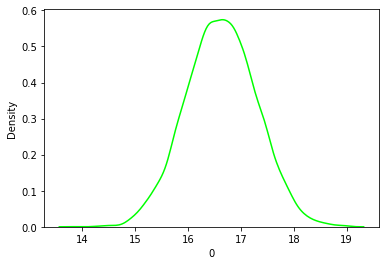

In [32]:
sns.distplot(data_sample_r[0] , color = 'lime' , hist=False)